### Heart Disease Prediction Using Logistic Regression

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
df = pd.read_csv('./data/framingham.csv')

In [23]:
df.shape

(4238, 16)

In [24]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [25]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [26]:
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [27]:
df = df.dropna()

In [28]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [29]:
df.shape

(3656, 16)

In [30]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<Axes: >

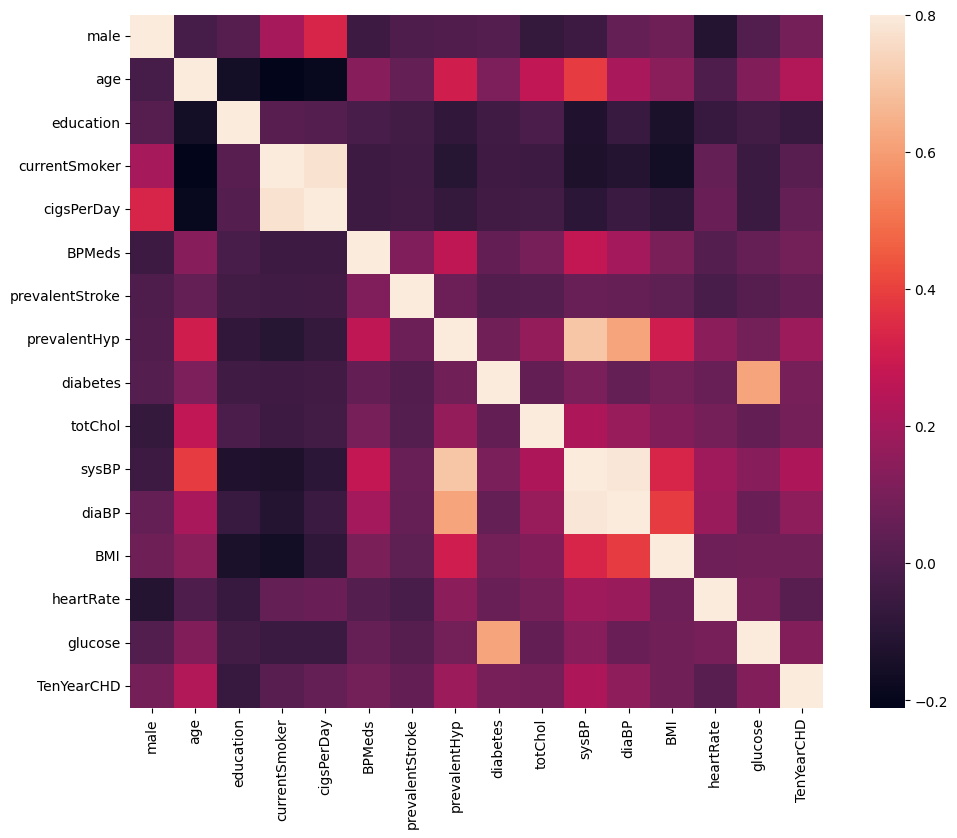

In [31]:
# chack for correlation

corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In logistic regression varibles do not necessarily need to correlate. This was just made for fun visualization

In [36]:
X = df.iloc[:, :15]
y = df.iloc[:, -1]


In [37]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new_Xtrain = sc.fit_transform(X_train)
new_Xtest = sc.transform(X_test)

In [40]:
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(new_Xtrain, y_train)
predictions = model.predict(new_Xtest)


print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('F1 score: ', f1_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       923
           1       0.61      0.10      0.17       174

    accuracy                           0.85      1097
   macro avg       0.73      0.54      0.54      1097
weighted avg       0.81      0.85      0.80      1097

Predicted labels:  [0 0 0 ... 0 0 0]
F1 score:  0.16831683168316833


In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[912,  11],
       [157,  17]])

In [42]:
from sklearn.metrics import accuracy_score
print('Accuracy =', accuracy_score(y_test, predictions))

Accuracy = 0.8468550592525068


In [44]:
# Model accuracy without standard scaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
# print('Predicted labels: ', predictions)
print('F1 score: ', f1_score(y_test, predictions))

confusion_matrix(y_test, predictions)
print('Accuracy =', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       923
           1       0.50      0.03      0.06       174

    accuracy                           0.84      1097
   macro avg       0.67      0.51      0.49      1097
weighted avg       0.79      0.84      0.78      1097

F1 score:  0.06451612903225806
Accuracy = 0.8413855970829535


/workspaces/Heart-Disease-Prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model better when scaled

/workspaces/Heart-Disease-Prediction/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


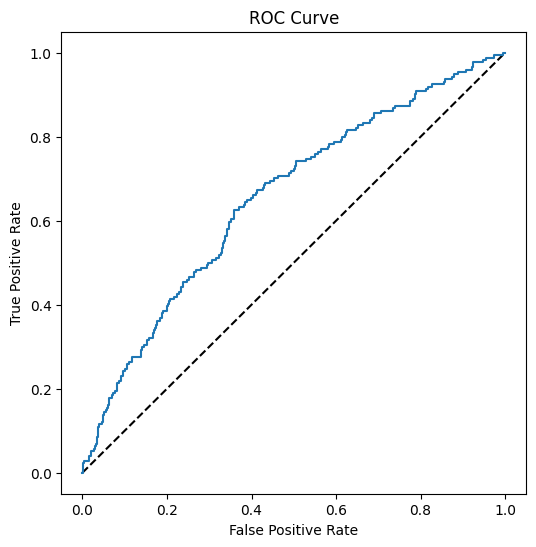

In [46]:
# ROC Curve

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(new_Xtest)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

<Axes: xlabel='TenYearCHD', ylabel='count'>

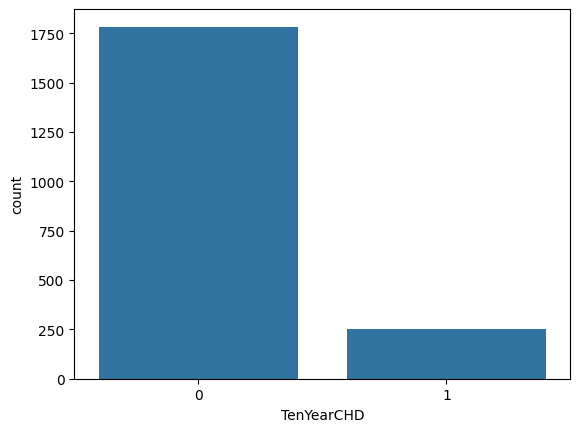

In [51]:
# Get data of men and women vs TenYearCHD

women = df[df['male'] == 0]

sns.countplot(women, x='TenYearCHD')

<Axes: xlabel='TenYearCHD', ylabel='count'>

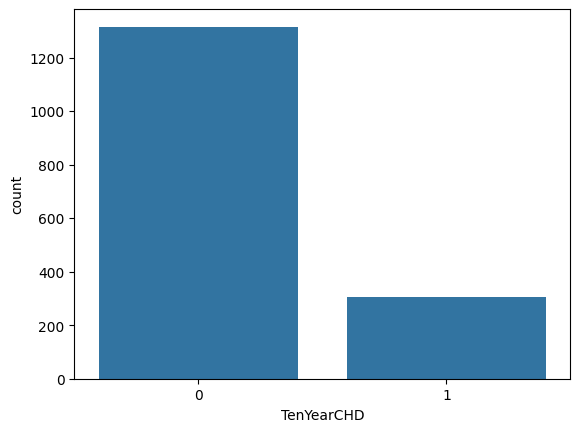

In [52]:
men = df[df['male'] == 1]

sns.countplot(men, x='TenYearCHD')

From the above data, it seems Men have a higher Ten Year risk of Coronary Heart disease than women do